In [245]:
from __future__ import print_function, division
import scipy

from keras.datasets import mnist
from keras_contrib.layers.normalization import InstanceNormalization
from keras.layers import Input, Dense, Reshape, Flatten, Dropout, Concatenate
from keras.layers import BatchNormalization, Activation, ZeroPadding2D
from keras.layers.advanced_activations import LeakyReLU
from keras.layers.convolutional import UpSampling2D, Conv2D
from keras.models import Sequential, Model
from keras.optimizers import Adam
import datetime
import matplotlib.pyplot as plt
import sys
from data_loader import DataLoader
import numpy as np
import os

(128, 128)


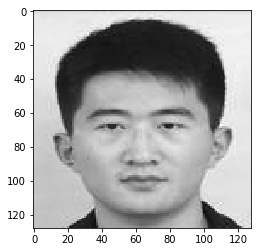

In [265]:
import numpy as np
import matplotlib.pyplot as plt
  
img = plt.imread('./2.jpg')
# print img.shape, img.dtype
# (200, 300, 3)  dtype('float32')
  

print(img.shape)
plt.imsave('red_elephant', img, cmap=plt.cm.gray)
plt.imshow(img, cmap=plt.cm.gray)
# plt.savefig('plot.png')
plt.show()
  
# # This saved only one channel (of RGB)
  
# plt.imshow(plt.imread('red_elephant.png'))
# plt.show()
  
# # Other libraries:
  
# from scipy.misc import imsave
# imsave('tiny_elephant.png', img[::6,::6])
# plt.imshow(plt.imread('tiny_elephant.png'), interpolation='nearest')
# plt.show()

In [246]:
import scipy
from glob import glob
import numpy as np
import matplotlib.pyplot as plt

class DataLoader():
    def __init__(self, dataset_name, img_res=(128, 128)):
        self.dataset_name = dataset_name
        self.img_res = img_res

    def load_data(self, batch_size=1, is_testing=False):
        data_type = ""
        path = glob('./datasets/%s/*' % (self.dataset_name))
        
        batch_images = sorted(path)
        print(batch_images)
        imgs_A = []
        imgs_B = []
        for img_path in batch_images:
            img = self.imread(img_path)

            h, w, _ = img.shape
            _w = int(w)
            img_A, img_B = img[:, :_w, :], img[:, :_w, :]

            img_A = scipy.misc.imresize(img_A, self.img_res)
            img_B = scipy.misc.imresize(img_B, self.img_res)

            # If training => do random flip
            if not is_testing and np.random.random() < 0.5:
                img_A = np.fliplr(img_A)
                img_B = np.fliplr(img_B)

            imgs_A.append(img_A)
            imgs_B.append(img_B)

#         imgs_A = np.array(imgs_A)/127.5 - 1.
        imgs_A = np.array(imgs_A)
       
        yield imgs_A

    def load_batch(self, batch_size=1, is_testing=False):
#         data_type = "train" if not is_testing else "val"
        path = glob('./datasets/%s/*' % (self.dataset_name))

        self.n_batches = int(len(path) / batch_size)

        for i in range(self.n_batches-1):
            batch = path[i*batch_size:(i+1)*batch_size]
            imgs_A, imgs_B = [], []
            for img in batch:
                img = self.imread(img)
                h, w, _ = img.shape
                half_w = int(w/2)
                img_A = img[:, : , :]
#                 img_B = img[:, half_w:, :]

                img_A = scipy.misc.imresize(img_A, self.img_res)
#                 img_B = scipy.misc.imresize(img_B, self.img_res)

                if not is_testing and np.random.random() > 0.5:
                        img_A = np.fliplr(img_A)
#                         img_B = np.fliplr(img_B)

                imgs_A.append(img_A)
#                 imgs_B.append(img_B)

            imgs_A = np.array(imgs_A)
#             imgs_B = np.array(imgs_B)

            yield imgs_A


    def imread(self, path):
        return scipy.misc.imread(path, mode='RGB').astype(np.float)


In [247]:
if __name__ == '__main__':
    test_data_loader = DataLoader(dataset_name="test", img_res=(128, 128))
    imgs_test = test_data_loader.load_data(batch_size=10)

In [248]:
    print(imgs_test)

<generator object DataLoader.load_data at 0x7f3a9e491d00>


['./datasets/test/0.jpg', './datasets/test/1.jpg', './datasets/test/2.jpg', './datasets/test/3.jpg', './datasets/test/4.jpg', './datasets/test/5.jpg', './datasets/test/6.jpg', './datasets/test/7.jpg', './datasets/test/8.jpg', './datasets/test/9.jpg']
10 128 3 176
(10, 128, 128)
(128, 128)


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:75: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:26: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:27: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.


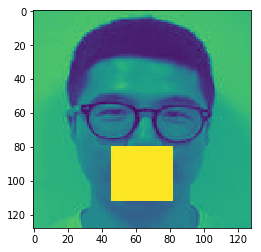

In [249]:
    def rgb2gray(rgb):
         return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

    aaa = list(imgs_test)[0]
    
    print(len(aaa),len(aaa[0][0]),len(aaa[0][0][0]) , aaa[0][0][0][0])
    sss = np.array(aaa)[:,:,:,1]
    
    print(sss.shape)
    gray = sss[0][::1]    
    print(gray.shape)
    plt.imshow(gray)
    plt.show()

In [250]:
x = np.array([[1,2],[3,4],[5,6]])
print (x.shape, x[:, :1]) 

(3, 2) [[1]
 [3]
 [5]]


In [20]:
import glob, os

# train_real_data_dir = r'./datasets/train/Real/*'
# train_white_data_dir = r'./datasets/train/White/*'
# train_real_data_list = []
# train_real_data_list.extend(real_list)
# 
# whitefiles = glob.glob("./datasets/train/White/*.jpg")

allfiles = os.listdir('./datasets/train/Real/')

newfilenamelist = list((i for i in range(0, 254)))
print(newfilenamelist)
newfilenamelist.pop(0)
# print(newfilenamelist)

for i in range(0, 254):
    
for filename in allfiles:
#   os.rename(afile,  afile + ".temp")
    templist = filename.split(".")
    strname = templist[0]
    intname = int(strname)
#     print(type(intname), intname)
    if intname == 6:
        print("ssss")
    
allfiles = glob.glob('./datasets/train/Real/*.temp')
count=0
for afile in allfiles:
  new_filename = str(count) + '.jpg'
  print (new_filename)
  os.rename(afile, new_filename)
  count += 1
print("Done")
print("Done")

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,